<a href="https://colab.research.google.com/github/jofmorenore/TS_Climatic/blob/main/python/TS_Climatic_variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
# https://stackoverflow.com/questions/74283327/conversion-py2rpy-not-defined-for-objects-of-type-class-str
#!pip install rpy2==3.5.1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Carga de datos ppt_SerieDiaria

In [4]:
# abrir el archivo en modo binario
with open('/content/drive/MyDrive/Time_Series_climatic_variebles/ptpm_max.pkl', 'rb') as file:
      
    # llama al método de carga para lectura de datos
    ptpm_max = pickle.load(file)
    print(ptpm_max.__class__) 
    print(ptpm_max)

<class 'pandas.core.series.Series'>
Fecha
1900-01-01 07:00:00      0.0
1900-01-02 07:00:00      0.0
1900-01-03 07:00:00     14.2
1900-01-04 07:00:00      2.2
1900-01-05 07:00:00      0.0
                       ...  
2022-09-26 07:00:00    151.1
2022-09-27 07:00:00    135.0
2022-09-28 07:00:00    162.0
2022-09-29 07:00:00    100.0
2022-09-30 07:00:00    132.0
Name: Valor, Length: 39136, dtype: float64


## Lectura de datos precipitación mensual en 846 estaciones de Colombia

In [5]:
pcp_col = pd.read_excel('/content/drive/MyDrive/Time_Series_climatic_variebles/pcp_col.xlsx')
# convierte las columnas en filas de 'Fecha', y luego las filas 'ID' en columnas
pcp_col = pcp_col.melt(id_vars = ['ID', 'X', 'Y'], var_name = 'Fecha', value_name = 'Valor').pivot_table('Valor', ['Fecha'], 'ID')
pcp_col.index = pd.to_datetime(pcp_col.index)
print(pcp_col.index.__class__)
print([pcp_col.shape, min(pcp_col.index), max(pcp_col.index)])
pcp_col.tail(5)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
[(469, 846), Timestamp('1981-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00')]


ID,11010010.0,11020010.0,11020050.0,11030010.0,11030030.0,11030040.0,11035010.0,11035020.0,11040010.0,11045010.0,...,54020010.0,54020020.0,54020040.0,54020080.0,54025010.0,54085010.0,54090010.0,55010020.0,55015010.0,56015010.0
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-09-01,1326.5,-999.0,-999.0,1291.0,-999.0,-999.0,-999.0,-999.0,435.0,721.3,...,1174.0,528.0,457.0,643.0,407.4,-999.0,678.0,702.0,-999.0,606.0
2019-10-01,933.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,870.0,840.4,...,758.0,-999.0,-999.0,671.0,391.5,-999.0,-999.0,-999.0,-999.0,834.2
2019-11-01,500.8,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,706.0,...,798.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,468.5
2019-12-01,831.4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,984.7,...,963.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,507.6
2020-01-01,629.1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,674.6,...,560.0,-999.0,-999.0,-999.0,152.5,-999.0,-999.0,-999.0,-999.0,331.1


In [6]:
# valores negativos únicos
print(np.unique([i for j in [np.unique(pcp_col[pcp_col.columns[i]][pcp_col[pcp_col.columns[i]]<0]) for i in range(pcp_col.shape[1])] for i in j]))
# frecuencia de los valores negativos
pd.DataFrame({'neg_count': [sum(pcp_col.iloc[:,j]<0) for j in range(pcp_col.shape[1])]}).describe()

[-999.]


,neg_count
count,846.000000
mean,5.388889
std,9.832265
min,0.000000
25%,0.000000
50%,2.500000
75%,7.000000
max,109.000000


In [7]:
# reemplaza valores negativos con el anterior, si el valor anterior o el siguiente es negativo reemplaza con None
#if pcp_col.iloc[i-1,j]<0 or pcp_col.iloc[min(i+1,pcp_col.shape[0]-1),j]<0 and sum(pcp_col.iloc[:,j]<0)>1:
for j in range(pcp_col.shape[1]):
    for i in range(pcp_col.shape[0]):
        if pcp_col.iloc[i,j]<0:
            if pcp_col.iloc[i-1,j]<0 or pcp_col.iloc[min(i+1,pcp_col.shape[0]-1),j]<0:
                pcp_col.iloc[i,j] = None
            else:
                pcp_col.iloc[i,j] = pcp_col.iloc[i-1,j]
        else: pcp_col.iloc[i,j] = pcp_col.iloc[i,j]

In [8]:
# chequeo de valores negativos únicos
print(np.unique([i for j in [np.unique(pcp_col[pcp_col.columns[i]][pcp_col[pcp_col.columns[i]]<0]) for i in range(pcp_col.shape[1])] for i in j]))

[]


In [9]:
pcp_col.tail(5)

ID,11010010.0,11020010.0,11020050.0,11030010.0,11030030.0,11030040.0,11035010.0,11035020.0,11040010.0,11045010.0,...,54020010.0,54020020.0,54020040.0,54020080.0,54025010.0,54085010.0,54090010.0,55010020.0,55015010.0,56015010.0
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-09-01,1326.5,NaN,NaN,1291.0,NaN,NaN,NaN,NaN,435.0,721.3,...,1174.0,528.0,457.0,643.0,407.4,NaN,678.0,702.0,NaN,606.0
2019-10-01,933.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,870.0,840.4,...,758.0,NaN,NaN,671.0,391.5,NaN,NaN,NaN,NaN,834.2
2019-11-01,500.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,706.0,...,798.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,468.5
2019-12-01,831.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,984.7,...,963.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,507.6
2020-01-01,629.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.6,...,560.0,NaN,NaN,NaN,152.5,NaN,NaN,NaN,NaN,331.1


In [10]:
# en las columnas (~50% del total de columnas) con valores faltantes, el % de faltantes va de 0.2% - 12% 
pd.DataFrame({'nan_count': [sum(pd.isna(pcp_col.iloc[:,j])) for j in range(pcp_col.shape[1])]}).describe()#/pcp_col.shape[1]

,nan_count
count,846.000000
mean,4.796690
std,9.555879
min,0.000000
25%,0.000000
50%,2.000000
75%,6.000000
max,109.000000


## Lectura de datos temperatura mensual en 208 estaciones de Colombia

In [11]:
tmed_col = pd.read_excel('/content/drive/MyDrive/Time_Series_climatic_variebles/tmed_col2.xlsx', sheet_name= 'Data')
tmed_col = tmed_col.pivot_table('obs_values', ['Date'], 'ID')
print([tmed_col.shape, min(tmed_col.index), max(tmed_col.index)])
tmed_col.tail(3)

[(474, 208), Timestamp('1981-01-01 00:00:00'), Timestamp('2020-06-01 00:00:00')]


ID,11045010.0,11115020.0,12015020.0,12015070.0,12045020.0,13075010.0,13075020.0,13085010.0,13085030.0,13085040.0,...,52045040.0,52055010.0,52055020.0,52055030.0,52055040.0,52055060.0,52055090.0,54015010.0,54025010.0,56015010.0
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,26.9,24.5,27.5,28.3,29.5,29.0,29.4,28.6,27.6,30.2,...,18.4,12.3,12.2,20.8,13.7,20.5,13.9,19.0,21.4,26.1
2020-05-01,27.0,-999.0,27.3,28.0,29.3,28.6,28.2,28.9,27.5,29.2,...,19.0,12.4,12.2,21.1,13.8,20.9,14.0,19.4,21.8,26.5
2020-06-01,26.5,-999.0,27.3,27.5,28.4,28.3,28.2,28.5,27.5,28.4,...,18.3,11.8,11.6,21.0,13.5,20.3,13.6,18.7,21.3,26.1


In [12]:
# únicos valores negativos
print(np.unique([i for j in [np.unique(tmed_col[tmed_col.columns[i]][tmed_col[tmed_col.columns[i]]<0]) for i in range(tmed_col.shape[1])] for i in j]))
# frecuencia de los valores negativos
pd.DataFrame({'neg_count': [sum(tmed_col.iloc[:,j]<0) for j in range(tmed_col.shape[1])]}).describe()

[-999.]


,neg_count
count,208.000000
mean,3.596154
std,6.425371
min,0.000000
25%,0.000000
50%,0.000000
75%,4.000000
max,32.000000


In [13]:
for j in range(tmed_col.shape[1]):
    for i in range(tmed_col.shape[0]):
        if tmed_col.iloc[i,j]<=0:
          if tmed_col.iloc[i-1,j]<0 or tmed_col.iloc[min(i+1,tmed_col.shape[0]-1),j]<0:
            tmed_col.iloc[i,j] = None
          else:
            tmed_col.iloc[i,j] = tmed_col.iloc[i-1,j]            
        else: tmed_col.iloc[i,j] = tmed_col.iloc[i,j]

In [14]:
tmed_col.tail(3)

ID,11045010.0,11115020.0,12015020.0,12015070.0,12045020.0,13075010.0,13075020.0,13085010.0,13085030.0,13085040.0,...,52045040.0,52055010.0,52055020.0,52055030.0,52055040.0,52055060.0,52055090.0,54015010.0,54025010.0,56015010.0
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,26.9,24.5,27.5,28.3,29.5,29.0,29.4,28.6,27.6,30.2,...,18.4,12.3,12.2,20.8,13.7,20.5,13.9,19.0,21.4,26.1
2020-05-01,27.0,NaN,27.3,28.0,29.3,28.6,28.2,28.9,27.5,29.2,...,19.0,12.4,12.2,21.1,13.8,20.9,14.0,19.4,21.8,26.5
2020-06-01,26.5,NaN,27.3,27.5,28.4,28.3,28.2,28.5,27.5,28.4,...,18.3,11.8,11.6,21.0,13.5,20.3,13.6,18.7,21.3,26.1


In [15]:
# en las columnas (~25% del total de columnas) con valores faltantes, el % de faltantes va de 1.4% - 15% 
pd.DataFrame({'neg_count': [sum(pd.isna(tmed_col.iloc[:,j])) for j in range(tmed_col.shape[1])]}).describe()#/tmed_col.shape[1]

,neg_count
count,208.000000
mean,3.086538
std,6.080952
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,32.000000


In [16]:
%load_ext rpy2.ipython

In [17]:
%%R
getwd()

[1] "/content"


In [18]:
%%R
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/liblapack.so.3

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

loaded via a namespace (and not attached):
[1] compiler_4.2.2


In [19]:
%R -i ptpm_max

In [20]:
%R -i pcp_col

In [21]:
%R -i tmed_col

In [22]:
%%R
#install.packages("tsibble")

NULL


In [23]:
%%R
library(dplyr)
library(ggplot2)
library(lubridate)
library(tsibble)

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’



    date, intersect, setdiff, union


Attaching package: ‘tsibble’



    interval



    intersect, setdiff, union




In [24]:
%%R
ts_ptpm_max = tsibble(Fecha = as_datetime(names(ptpm_max)) , ptpm_max = ptpm_max, index = Fecha)
str(ts_ptpm_max)

tbl_ts [39,136 × 2] (S3: tbl_ts/tbl_df/tbl/data.frame)
 $ Fecha   : POSIXct[1:39136], format: "1900-01-01 07:00:00" "1900-01-02 07:00:00" ...
 $ ptpm_max: Named num [1:39136] 0 0 14.2 2.2 0 0 8 0 0 0 ...
  ..- attr(*, "names")= chr [1:39136] "1900-01-01 07:00:00" "1900-01-02 07:00:00" "1900-01-03 07:00:00" "1900-01-04 07:00:00" ...
 - attr(*, "key")= tibble [1 × 1] (S3: tbl_df/tbl/data.frame)
  ..$ .rows: list<int> [1:1] 
  .. ..$ : int [1:39136] 1 2 3 4 5 6 7 8 9 10 ...
  .. ..@ ptype: int(0) 
 - attr(*, "index")= chr "Fecha"
  ..- attr(*, "ordered")= logi TRUE
 - attr(*, "index2")= chr "Fecha"
 - attr(*, "interval")= interval [1:1] 1s
  ..@ .regular: logi TRUE


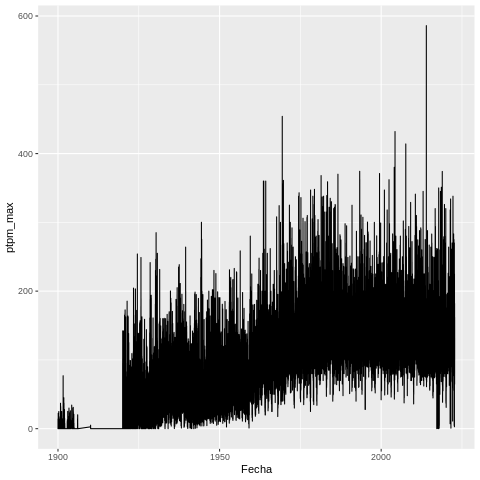

In [25]:
%%R
ts_ptpm_max %>%
  ggplot(aes(x = Fecha, y = ptpm_max)) +
  geom_line()

In [26]:
#%%R
#date_min = min(as_datetime(names(ptpm_max)))
#date_max = max(as_datetime(names(ptpm_max)))
#ts_ptpm_max = ts(ptpm_max, frequency = 365, 
#                 start = c(year(date_min), month(date_min), day(date_min)),
#                 end = c(year(date_max), month(date_max), day(date_max)))
#str(ts_ptpm_max)
#plot(ts_ptpm_max)

In [27]:
%%R
ts_pcp_col = ts(pcp_col, frequency = 12, start = c(1980, 1))
str(ts_pcp_col)

 Time-Series [1:469, 1:846] from 1980 to 2019: 666 687 545 836 707 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:846] "11010010.0" "11020010.0" "11020050.0" "11030010.0" ...


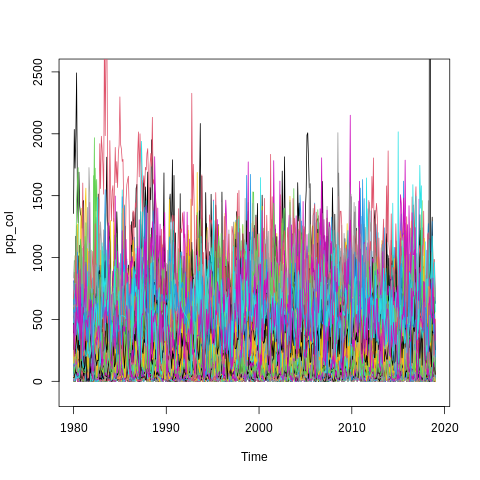

In [28]:
%%R
plot(ts_pcp_col[,1], ylim = c(-100,2500), ylab = "pcp_col")
for(i in 2:ncol(ts_pcp_col)){
    lines(ts_pcp_col[,i], type = "l", col = i)
}

In [29]:
%%R
ts_tmed_col = ts(tmed_col, frequency = 12, start = c(1981, 1))
str(ts_tmed_col)

 Time-Series [1:474, 1:208] from 1981 to 2020: 25.7 25.6 25.9 26.2 26.4 25.6 25.9 25.5 26.1 25.4 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:208] "11045010.0" "11115020.0" "12015020.0" "12015070.0" ...


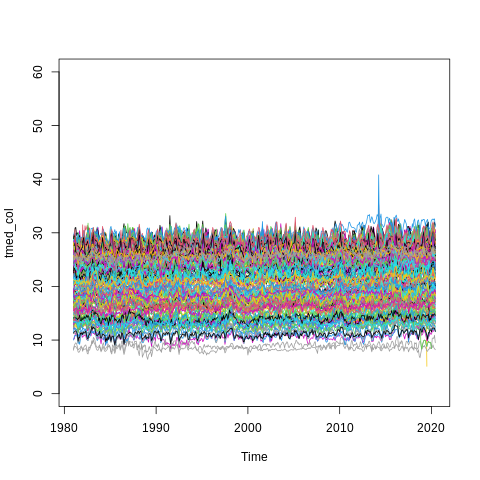

In [30]:
%%R
par(mfrow=c(1,1))
plot(ts_tmed_col[,1], ylim = c(0,60), ylab = "tmed_col")
for(i in 2:ncol(ts_tmed_col)){
    lines(ts_tmed_col[,i], type = "l", col = i)
}

In [31]:
%%R
save(df, file='/content/drive/MyDrive/Time_Series_climatic_variebles/ts_ptpm_max.rda')
save(df, file='/content/drive/MyDrive/Time_Series_climatic_variebles/ts_pcp_col.rda')
save(df, file='/content/drive/MyDrive/Time_Series_climatic_variebles/ts_tmed_col.rda')